In [1]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pymc_ext as pmx
import pytensor.tensor  as pt
import exoplanet as xo

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# test LogNormal

In [2]:
with pm.Model() as model:
    # log_sigma_gp_rv = pm.Normal("log_sigma_gp_rv", mu=np.log(10), sigma=50)
    # log_sigma1 = pm.Normal("log_sigma1", mu=np.log(10), sigma=10)
    # #log_sigma2 = pm.Normal("log_sigma2", mu=0, sigma=10)
    # sigma1 = pm.Deterministic("sigma1", pt.exp(log_sigma1))
    # #sigma2 = pm.Deterministic("sigma2", pt.exp(log_sigma2))
    # #log_rho_gp_rv = pm.Normal("log_rho_gp_rv", mu=np.log(50), sigma=50)
    # #sigma_gp_rv = pm.Deterministic("sigma_gp_rv", pt.exp(log_sigma_gp_rv))
    # sigma = pm.HalfNormal("sigma", sigma=20)
    # log_rho = pm.Normal("log_rho", mu=2, sigma=1)
    # rho_2 = pm.Deterministic("rho_2", pt.exp(log_rho))

    prueba1 = pm.Normal("prueba1", mu=np.log(3), sigma=0.1)
    prueba2 = pm.Deterministic("prueba2", pt.exp(prueba1))
    # prueba3 = pm.Uniform("prueba3", lower=0, upper=10)
    # prueba4 = pm.Deterministic("prueba4", pt.exp(prueba3))
    #prueba3 = xo.eccentricity.kipping13("kipping13")
    # sigma_l2c = pm.LogNormal("sigma_lc2", mu=0.733, sigma=1)

In [3]:
# comprobado que lognormal con mu=a, sigma=b es igual a normal con mu=a, sigma=b y luego pt.exp(Normal)
# comprobado que poner sigma=10 en una lognormal es muchísimo, incluso si la media es cero

In [4]:
with model:
    trace = pm.sample(
        tune=2000, #2500,
        draws=2000, #2000,
        chains=2, #4
        return_inferencedata=True,)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [prueba1]


Output()

Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


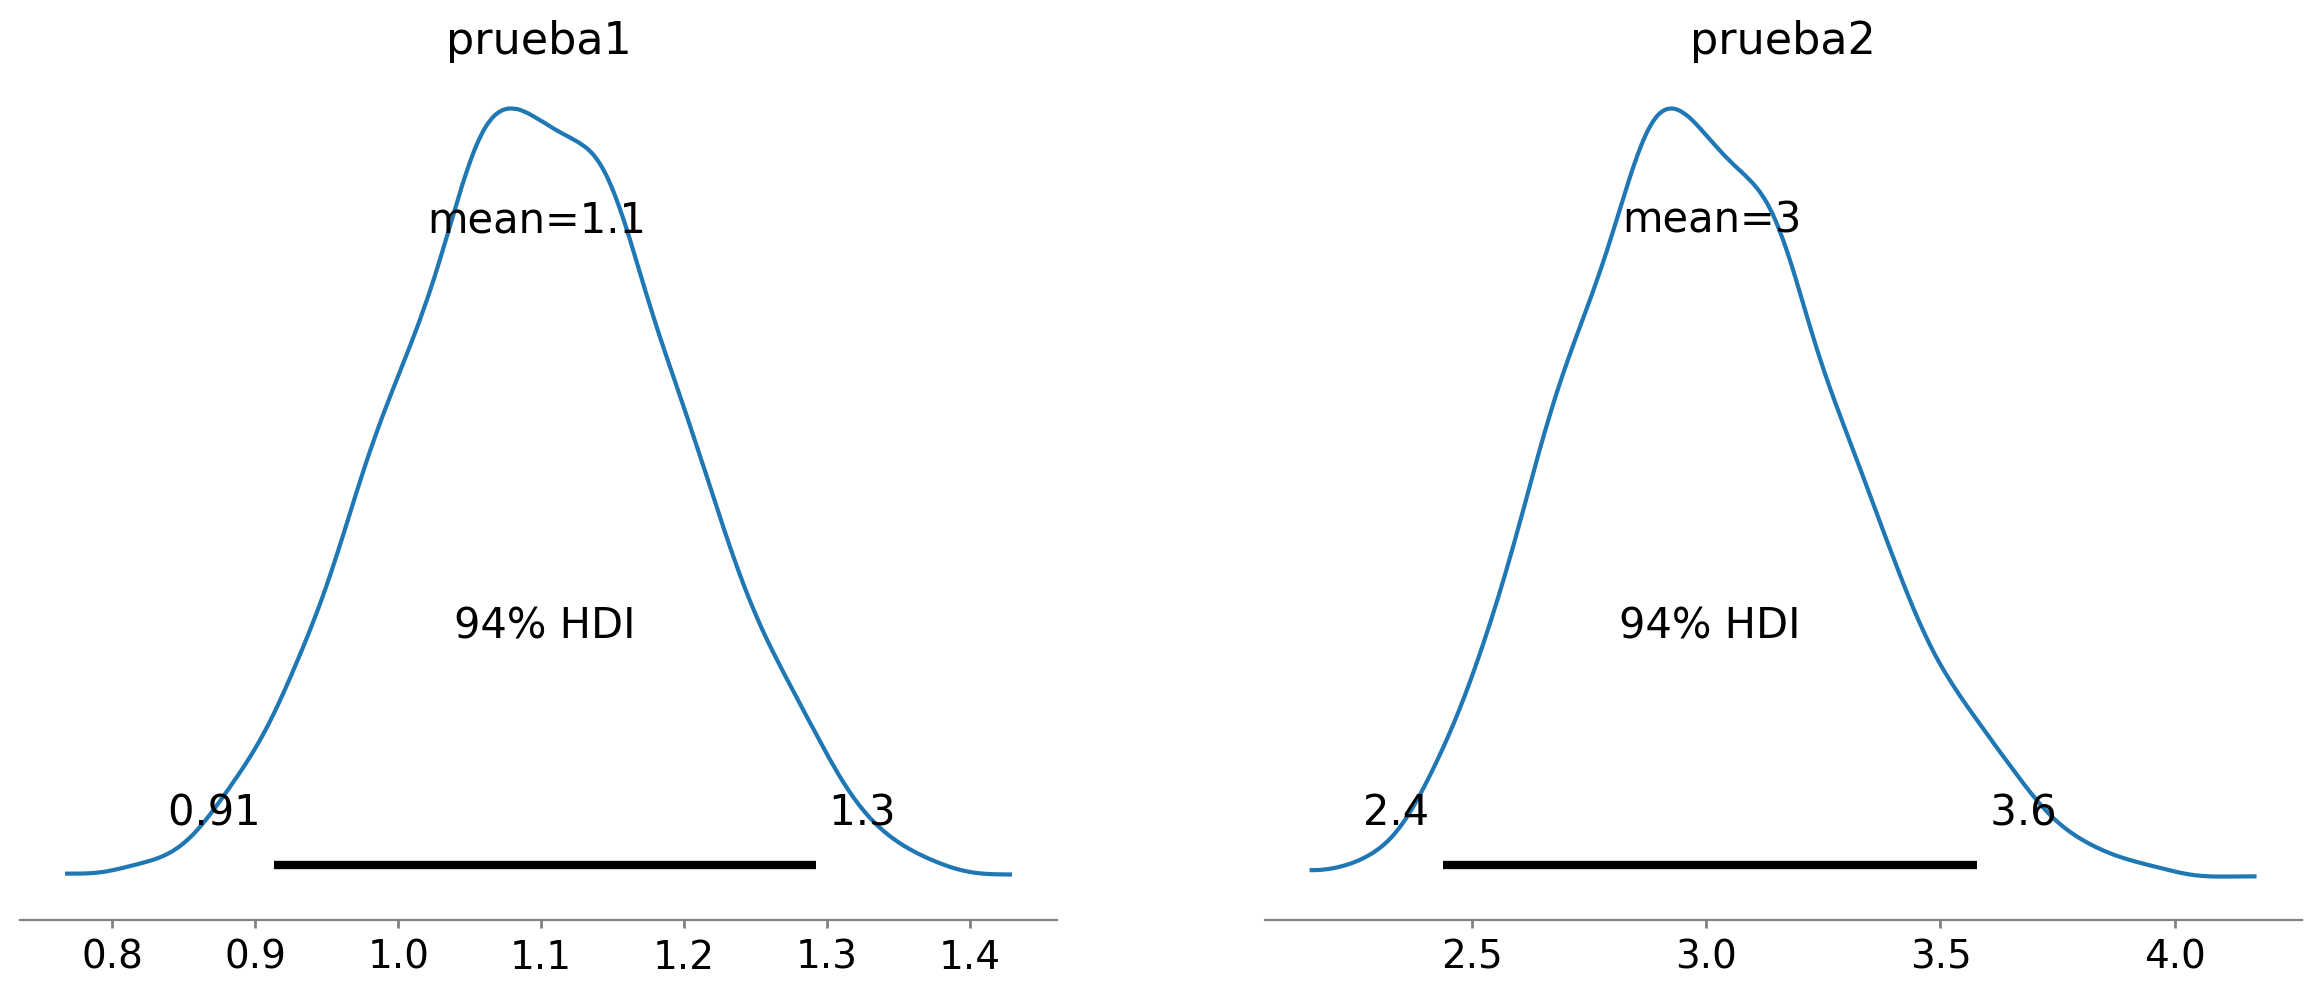

In [5]:
ax = az.plot_posterior(trace)
# plt.xlim(0,200)
# plt.ylim(0, 0.001)

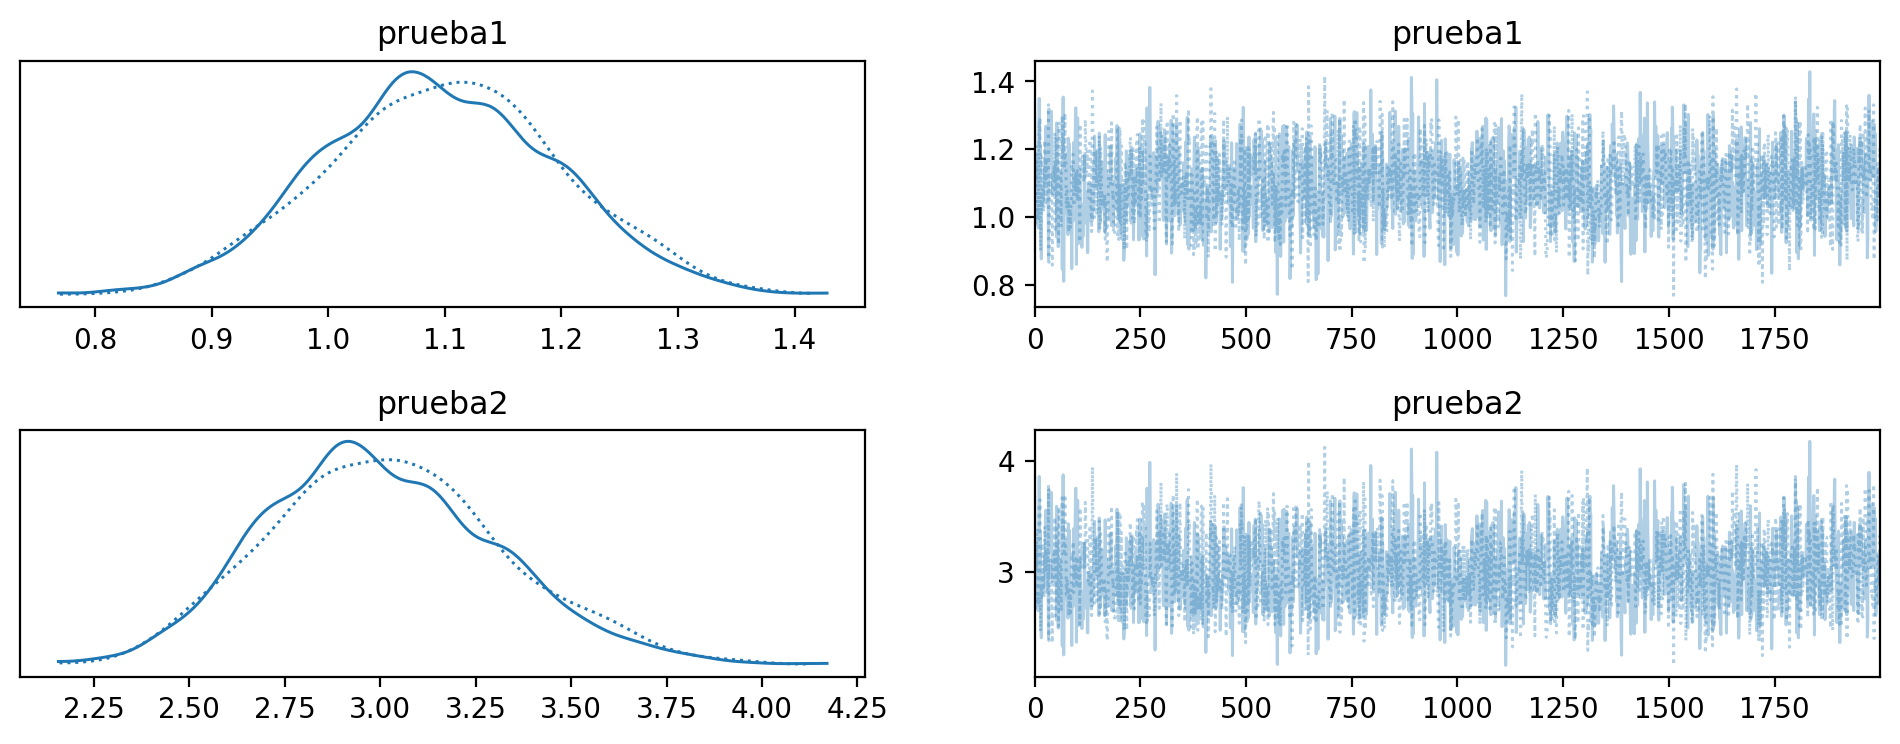

In [6]:
az.plot_trace(trace)
plt.subplots_adjust(hspace=0.5)

In [7]:
flat_samps = trace.posterior.stack(samples=("chain", "draw"))

In [8]:
np.median(flat_samps.prueba2.values, axis=0)

6.1435264631739415

In [94]:
np.exp(np.median(flat_samps.prueba3.values, axis=0))

4.704533000330292

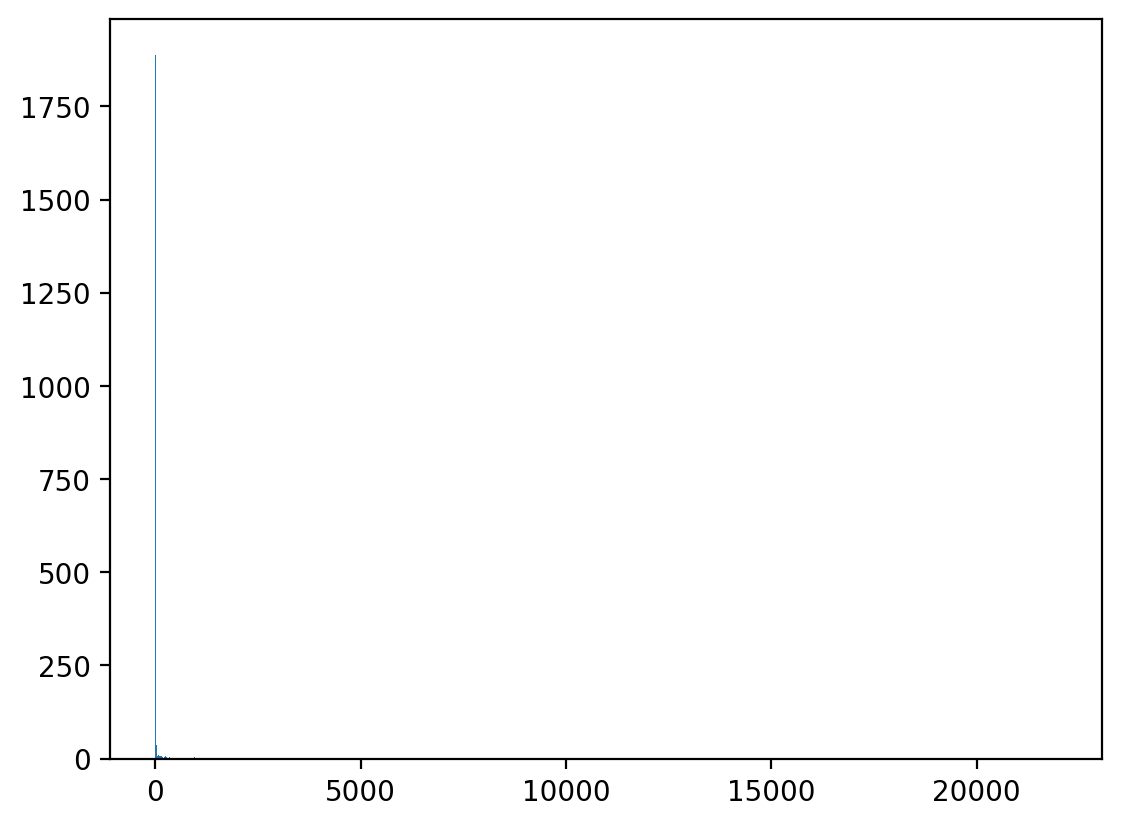

In [96]:
plt.hist(flat_samps.prueba4.values, bins=8000);
# plt.xlim(0, 21400)
